## Read the data

In [784]:
import pandas as pd

df = pd.read_excel('madrid_rent_data.xlsx')

df_original = df.__deepcopy__()

## Explore the data
df.head()

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Ciudad Lineal,Piso en Quintana,NaN,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0
3,4,Ciudad Lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0


## Remove uneeded columns

In [785]:
df = df.drop(columns=['Address', 'Number', 'District'])

df.head()

,Id,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0
1,2,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0
2,3,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0
3,4,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0
4,5,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0


## Get the data types

And replace null values

In [786]:
df.isnull().sum()

Id                0
Area              4
Rent              0
Bedrooms         89
Sq.Mt             0
Floor           141
Outer           162
Elevator        133
Penthouse         0
Cottage           0
Duplex            0
Semidetached      0
dtype: int64

In [787]:
# df['Area'] = df['Area'].fillna("N/A")

df = df.fillna(0)
df['Area'] = df['Area'].replace(0, "Unknown")

## Separate labels and features

In [788]:
labels = df.pop('Id')
x = df

## Feature engineering

In [789]:
import numpy as np
# Add new features

x['rent_per_sqm'] = (x['Rent'] / x['Sq.Mt'])
x['rent_per_sqm'] = x['rent_per_sqm'].replace(np.inf, 0)
x['rent_per_bedroom'] = x['Rent'] / x['Bedrooms']
x['rent_per_bedroom'] = x['rent_per_bedroom'].replace(np.inf, 0)
x['sqm_per_bedroom'] = x['Sq.Mt'] / x['Bedrooms']
x['sqm_per_bedroom'] = x['sqm_per_bedroom'].replace(np.inf, 0)

In [790]:
x.head()

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,rent_per_sqm,rent_per_bedroom,sqm_per_bedroom
0,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0,18.055556,650.000000,36.0
1,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0,11.538462,600.000000,52.0
2,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0,13.000000,650.000000,50.0
3,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0,13.333333,533.333333,40.0
4,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0,13.333333,400.000000,30.0


In [791]:
# Find the categorical columns and numerical columns that we want to preprocess

categorical_columns = ['Area']
numerical_columns = ['Rent', 'Bedrooms', 'Sq.Mt', 'Floor', 'rent_per_sqm', 'rent_per_bedroom', 'sqm_per_bedroom']

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

Categorical columns: ['Area']
Numerical columns: ['Rent', 'Bedrooms', 'Sq.Mt', 'Floor', 'rent_per_sqm', 'rent_per_bedroom', 'sqm_per_bedroom']


In [792]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Create pipeline for categorical variables 
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Create pipeline for numerical variables
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categorical', categorical_pipeline, categorical_columns),
        ('numerical', numerical_pipeline, numerical_columns)
    ], 
    remainder="passthrough"
)

In [793]:
x = preprocessor.fit_transform(x)

# turn into dataframe
x = pd.DataFrame(x)

# rename columns
x.columns = preprocessor.get_feature_names_out()

x.head()

,categorical__Area_Abrantes,categorical__Area_Acacias,categorical__Area_Adelfas,categorical__Area_Almagro,categorical__Area_Almendrales,categorical__Area_Aluche,categorical__Area_Ambroz,categorical__Area_Apóstol Santiago,categorical__Area_Arapiles,categorical__Area_Aravaca,...,numerical__Floor,numerical__rent_per_sqm,numerical__rent_per_bedroom,numerical__sqm_per_bedroom,remainder__Outer,remainder__Elevator,remainder__Penthouse,remainder__Cottage,remainder__Duplex,remainder__Semidetached
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000093,0.232286,0.130000,0.186207,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000070,0.120610,0.120000,0.268966,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000093,0.145655,0.130000,0.258621,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000116,0.151367,0.106667,0.206897,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000093,0.151367,0.080000,0.155172,1.0,0.0,0.0,0.0,0.0,0.0


## Show correlation betwenn features

In [794]:
corr_matrix = x.corr()
corr_pairs = corr_matrix.abs().unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
filtered_corr = corr_pairs[(corr_pairs['Variable 1'] != corr_pairs['Variable 2']) & (corr_pairs['Correlation'] > 0.5)]
sorted_corr = filtered_corr.sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])
sorted_corr.reset_index(drop=True, inplace=True)
sorted_corr

,Variable 1,Variable 2,Correlation
0,numerical__Sq.Mt,numerical__Rent,0.826007
1,numerical__Bedrooms,numerical__Sq.Mt,0.743397
2,numerical__rent_per_bedroom,numerical__sqm_per_bedroom,0.685004
3,numerical__Sq.Mt,numerical__sqm_per_bedroom,0.622936
4,numerical__Rent,numerical__Bedrooms,0.620924
5,remainder__Cottage,numerical__Sq.Mt,0.605316
6,numerical__rent_per_sqm,numerical__rent_per_bedroom,0.577579
7,numerical__sqm_per_bedroom,numerical__Rent,0.567188
8,remainder__Cottage,remainder__Semidetached,0.555805
9,numerical__rent_per_bedroom,numerical__Rent,0.546467


## Do the elbow method to find the best number of clusters

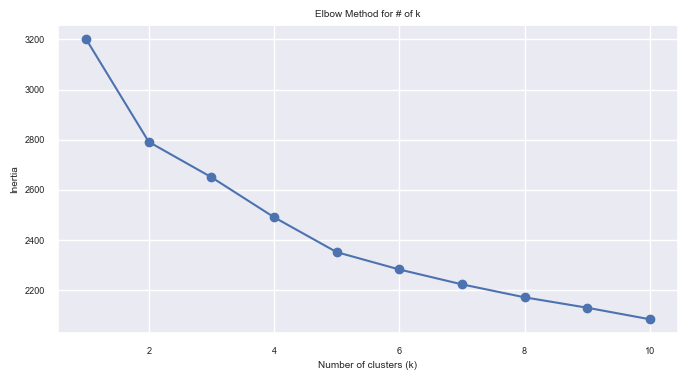

In [795]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

RANDOM_STATE = 42

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for # of k')
plt.show()

## Run K-means clustering

In [796]:
from sklearn.cluster import KMeans

n_clusters = 2  #This number might change with different data
clustering = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
clustering.fit(x)
labels = clustering.predict(x)
centroids = clustering.cluster_centers_

# Cluster labels
df_original['Cluster'] = clustering.labels_+1

df_original[["Id", "Cluster"]].sort_values("Cluster")

,Id,Cluster
0,1,1
1286,1349,1
1285,1348,1
1284,1347,1
1281,1344,1
...,...,...
1589,1661,2
362,383,2
361,382,2
1621,1694,2


## Show the cluster sizes

In [797]:
clustersizes = df_original.groupby('Cluster')['Id'].count().reset_index()
clustersizes.rename(columns={'Id': 'Count'}, inplace=True)

clustersizes

,Cluster,Count
0,1,1517
1,2,572


## Calculate the silhouette score and inertia

In [798]:
from sklearn.metrics import silhouette_score
import numpy as np

group_column = df_original["Cluster"]
silhouette_avg = silhouette_score(x, group_column)

# Inertia does not exist in hierarchical algoritm in scikit, so we need to calculate it
centroids = np.array([x[group_column == i].mean(axis=0) for i in range(n_clusters)])
inertia = sum(
    np.sum(np.linalg.norm(x[group_column == i] - centroids[i], axis=1)**2)
    for i in range(n_clusters)
)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {inertia:.3f}")

Silhouette Score: 0.178
Inertia: 1789.708


## Describe the clusters